rez[:15]=[(1, 1), (2, 2), (3, 33), (4, 2), (5, 2), (6, 27), (7, 3), (8, 0), (9, 44), (10, 1), (11, 0), (12, 34), (13, 1), (14, 1), (15, 40)]


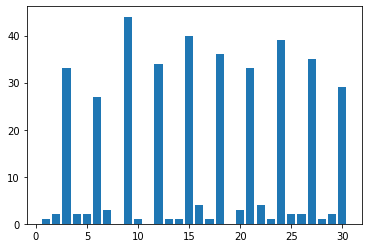

In [1]:
# Визначення періоду Віжинера
from base64 import b64decode
from matplotlib import pyplot as plt

s64 = ('G0IFOFVMLRAPI1QJbEQDbFEYOFEPJxAfI10JbEMFIUAAKRAfOVIfOFkYOUQFI15ML1kcJFUeYhA4IxAeKVQZL1'
    'VMOFgJbFMDIUAAKUgFOElMI1ZMOFgFPxADIlVMO1VMO1kAIBAZP1VMI14ANRAZPEAJPlMNP1VMIFUYOFUePxxMP19M'
    'OFgJbFsJNUMcLVMJbFkfbF8CIElMfgZNbGQDbFcJOBAYJFkfbF8CKRAeJVcEOBANOUQDIVEYJVMNIFwVbEkDORAbJV'
    'wAbEAeI1INLlwVbF4JKVRMOF9MOUMJbEMDIVVMP18eOBADKhALKV4JOFkPbFEAK18eJUQEIRBEO1gFL1hMO18eJ1UI'
    'bEQEKRAOKUMYbFwNP0RMNVUNPhlAbEMFIUUALUQJKBANIl4JLVwFIldMI0JMK0INKFkJIkRMKFUfL1UCOB5MH1UeJV'
    '8ZP1wVYBAbPlkYKRAFOBAeJVcEOBACI0dAbEkDORAbJVwAbF4JKVRMJURMOF9MKFUPJUAEKUJMOFgJbF4JNERMI14J'
    'bFEfbEcJIFxCbHIJLUJMJV5MIVkCKBxMOFgJPlWOzKkfbF4DbEMcLVMJPx5MRlgYOEAfdh9DKF8PPx4LI18LIFVCL1'
    '8BY1QDL0UBKV4YY1RDfXg1e3QAYQUFOGkof3MzK1sZKXIaOnIqPGRYD1UPC2AFHgNcDkMtHlw4PGFDKVQFOA8ZP0BR'
    'P1gNPlkCKw==')
##bs64x = s64.encode()  # Рядок символів (base64) у рядок байтів (base64)   # UPD: Виявилось що це не обов'язково  
mess = b64decode(s64)  # Рядок байтів (base64) в !!! рядок байтів закодованого повідомлення
len_mess = len(mess)
# За допомогою зрушень (від 1 до 30) повідомлення та підрахунку кількох збігів символів
rez = []
for shift in range(1, 30 + 1):
    mess_shifted = mess[shift:] + mess[:shift]
    count = 0
    # перебір пар символів, підрахунок збігів
    for a, b in zip(mess, mess_shifted):
        if a == b:
            count += 1
    rez.append((shift, count))
# перші 15 кодів для контролю
print(f'{rez[:15]=}')
# Побудуємо гістограму для перших 30 точок
x, y = zip(*rez)
plt.bar(x, y)
plt.show()

In [4]:
from pprint import pprint
period = 3
print(f'len_mess / period = {len_mess} / {period} = {len_mess/period}')

# розбиваємо повідомлення на групи та спробуємо підібрати коди
# для кожної групи окремо, щоб результат складався максимально з англійських букв
groups = {}  # list(zip(*[mess[i:i + period] for i in range(0, len_mess, period)]))
for i in range(len_mess):
    groups.setdefault(i % period, []).append(mess[i])
# Виведемо з кожної групи по 10 кодів (символів) для контролю
print(*[(gr, sub_mess[:10]) for gr, sub_mess in groups.items()], sep='\n')

len_mess / period = 544 / 3 = 181.33333333333334
(0, [27, 56, 45, 35, 108, 108, 56, 39, 35, 108])
(1, [66, 85, 16, 84, 68, 81, 81, 16, 93, 67])
(2, [5, 76, 15, 9, 3, 24, 15, 31, 9, 5])


In [5]:
# Визначення максимальних частот однакових символів, закодованих загальним кодом
# Виведемо дані 4 символів максимальними частотами у кожній групі
chars = 4
frequs = []
for sub_mess in groups.values():
    counts = {}
    for ch in sub_mess:
        if ch in counts:
            counts[ch] += 1
        else:
            counts[ch] = 1       
    # (частота у відсотках, код)
    pars = sorted([(round(count / len(sub_mess) * 100, 1), ch) 
                for ch, count in counts.items()], reverse=True)[:chars]
    frequs.append(pars)
# Виведемо коди символів у порядку зменшення частоти % (частота, код)
pprint(frequs)

[[(14.3, 108), (12.1, 56), (7.7, 41), (6.6, 63)],
 [(12.2, 16), (10.5, 85), (6.6, 95), (6.1, 94)],
 [(16.6, 76), (12.2, 9), (6.6, 5), (6.1, 3)]]


In [6]:
# Декодуємо тексти в групах, а потім об'єднаємо їх в один рядок
# отримання ключів до груп з передбачуваних вихідних 
# символів та їх закодованих значень за групами
gr_keys = [ord(' ') ^ 108, ord(' ') ^ 16, ord(' ') ^ 76]
print(f'{gr_keys = }')
decoded_groups = {}
for gr, sub_mess in groups.items():
    for cod in sub_mess:
        decod = cod ^ gr_keys[gr]
        decoded_groups.setdefault(gr, []).append(decod)
# Виведемо з кожної групи по 10 кодів (символів) для контролю
print(*[(gr, sub_mess[:10]) for gr, sub_mess in decoded_groups.items()], sep='\n')        

gr_keys = [76, 48, 108]
(0, [87, 116, 97, 111, 32, 32, 116, 107, 111, 32])
(1, [114, 101, 32, 100, 116, 97, 97, 32, 109, 115])
(2, [105, 32, 99, 101, 111, 116, 99, 115, 101, 105])


In [7]:
# Об'єднаємо всі дешифровані групи в один байтовий рядок
decodes_all = sum(zip(*decoded_groups.values()), ())
print(decodes_all[:30])

(87, 114, 105, 116, 101, 32, 97, 32, 99, 111, 100, 101, 32, 116, 111, 32, 97, 116, 116, 97, 99, 107, 32, 115, 111, 109, 101, 32, 115, 105)


In [8]:
# далі набір кодів символів результуючого рядка в
# байтовий рядок і потім у нормальний рядок символів
bsx = bytes(decodes_all)
sx = bsx.decode()  # Рядок байтів у рядок символів
print(sx)

Write a code to attack some simple substitution cipher. To reduce the complexity of this one we will use only uppercase letters, so the keyspace is only 26! To get this one right automatically you will probably need to use some sort of genetic algorithm (which worked the best last year), simulated annealing or gradient descent. Seriously, write it right now, you will need it to decipher the next one as well. Bear in mind, there’s no spaces. 
https://docs.google.com/document/d/1HY7Dl-5itYD3C_gkueBvvBFpT4CecGPiR30BsARlTpQ/edit?usp=sharin
